# Project: Kickstarter Projects

For this project we will be analyzing some data for [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects) Kickstarter. The data contains the following fields:

* <b>ID</b>: Variable type int. Internal kickstarter id

* <b>name</b>: Variable type int. A project is a finite work with a clear goal that you’d like to bring to life.

* <b>category</b>: Variable type string. Category.

* <b>main_category</b>: Variable type string. Category of campaign.

* <b>currency</b>: Variable type string. Currency used to support.

* <b>deadline</b>: Variable type string. Deadline for crowdfunding.

* <b>goal</b>: Variable type float. Fundraising goal. The funding goal is the amount of money that a creator needs to               complete their project.

* <b>launched</b>: Variable type string. Date launched

* <b>pledged</b>: Variable type float. Amount pledged by "crowd".

* <b>state</b>: Variable type string. Current condition the project is in.

* <b>backers</b>: Variable type int. Number of backers.

* <b>country</b>: Variable type string. Country pledged from.

* <b>usd pledged</b>: Variable type float. Amount of money pledged.

* <b>usd_pledged_real</b>: Variable type float. Goal amount in USD.

* <b>usd_goal_real</b>: Variable type float.

# Data and Configuration:

<b> Import numpy and pandas:</b>

In [51]:
import pandas as pd
import numpy as np

<b>Importing the data visualization libraries used in this notebook: </b> 

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<b>Reading the csv file as a DataFrame named dk:</b>

In [53]:
dk = pd.read_csv('ks-projects-201801.csv')

<b> Check my DataFrame info using '.info()': </b>

In [54]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


<b> Check the header of my DataFrame.</b>

In [55]:
dk.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


<b> Verificando a existencia de valores duplicados </b>

In [81]:
#Verificando linhas duplicadas
sum(dk.duplicated())

0

#  Creating New Features:

Vamos começar a analisar o dado pelas colunas louched e deadline.
Queremos analisar quantos projetos foram lançados a cada mês de um ano especifico, por pais, para ver se encontramos um tendencia de crescimento entre esses meses. 

Para isso vamos começar tratando nossa coluna louched, criando uma nova coluna para o ano e mês de lançamento.

In [56]:
#Verificando o tipo da coluna launched
type(dk['launched'][0])

str

In [57]:
#Converterndo os dados da coluna Launched
dk['launched'] = pd.to_datetime(dk['launched'])

In [58]:
#Criando novas colunas para os anos e meses de lançamentos
dk['year_IL'] = dk['launched'].apply(lambda time: time.year)
dk['month_IL'] = dk['launched'].apply(lambda time: time.month)

In [60]:
dk.head(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year_IL,month_IL
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8


In [61]:
#Converterndo os dados da coluna deadline
dk['deadline'] = pd.to_datetime(dk['deadline'])

In [62]:
#Criando novas colunas para os anos e meses de deadline
dk['year_D'] = dk['deadline'].apply(lambda time: time.year)
dk['month_D'] = dk['deadline'].apply(lambda time: time.month)

In [63]:
#Verificando
dk.head(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year_IL,month_IL,year_D,month_D
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,2015,10


In [93]:
#Vamos analisar os dados de 2012 para cá
dk.drop(dk.index[(dk['year_IL'] == 1970)], inplace=True)

In [94]:
dk.drop(dk.index[(dk['year_IL'] == 2009)], inplace=True)
dk.drop(dk.index[(dk['year_IL'] == 2010)], inplace=True)
dk.drop(dk.index[(dk['year_IL'] == 2011)], inplace=True)

In [109]:
dk.drop(dk.index[(dk['year_IL'] == 2018)], inplace=True)

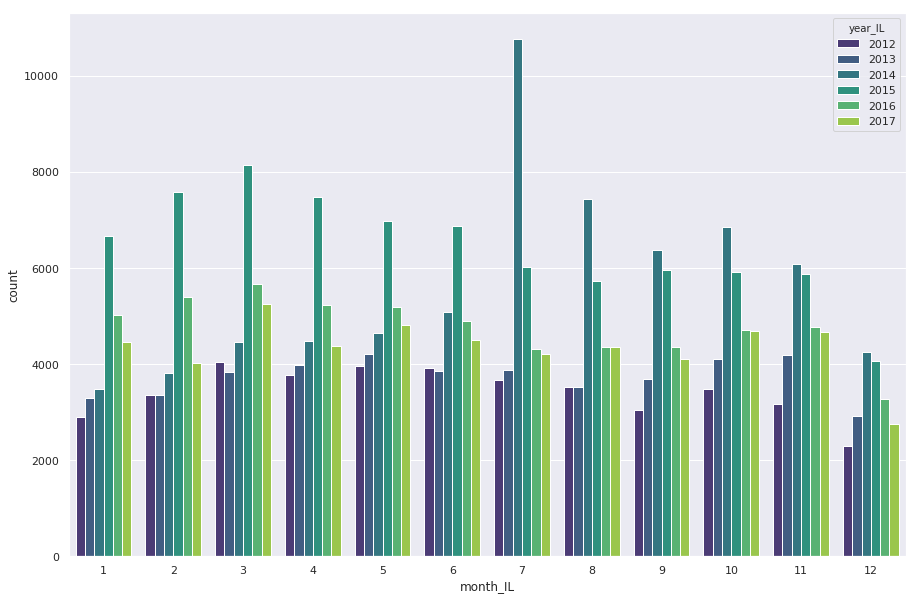

In [111]:
#fig, axes = sns.subplots(figsize=(8, 5))
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='month_IL', data=dk, hue='year_IL', palette='viridis' )

In [114]:
dk['year_IL'].value_counts(ascending=True)

2012    41165
2013    44851
2017    52200
2016    57184
2014    67745
2015    77300
Name: year_IL, dtype: int64

In [122]:
dk['year_IL'].value_counts().mean()

56740.833333333336

Podemos observar que uma meta de 56.741 tentativas de crowdfounding por ano, não é algo assustor para o site.
Vale lembrar que a temos um ano(2015) 'atipico' onde foi superado uma possível meta de novas tentativas

Vamos ver a média por mês de tentativas de crwdfounding e tentar notar qual o mês preferido para uma proposta, levando tambem em consideração o pais.

In [131]:
dk['country'].value_counts()

US      254454
GB       33655
CA       14750
AU        7833
DE        4169
N,0"      3797
FR        2938
IT        2877
NL        2868
ES        2275
SE        1755
MX        1750
NZ        1447
DK        1113
IE         811
CH         760
NO         708
HK         618
BE         617
AT         597
SG         552
LU          62
JP          39
Name: country, dtype: int64

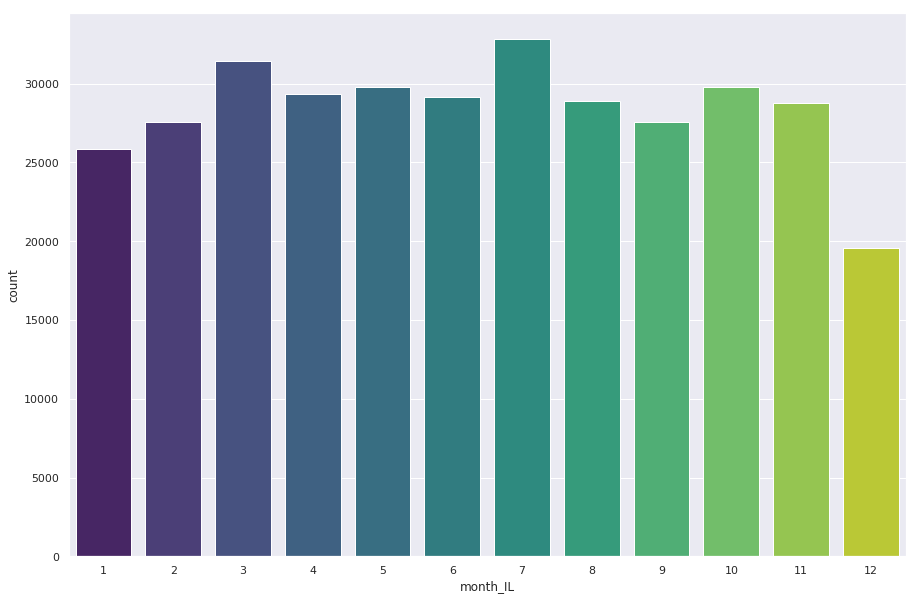

In [132]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='month_IL', data=dk, palette='viridis' )

Podemos observar que o mês 7 tem uma grande procura para quem está precisando dos servisos prestados pelo site, porém também podemos observar que possuimos uma grande outlier neste mês no ano de 2015 ( o que está influenciando diretamente neste gráfico)

In [121]:
dk.loc[dk['usd_pledged_real'].idxmax()] 

ID                                                        1799979574
name                Pebble Time - Awesome Smartwatch, No Compromises
category                                              Product Design
main_category                                                 Design
currency                                                         USD
deadline                                         2015-03-28 00:00:00
goal                                                          500000
launched                                         2015-02-24 15:44:42
pledged                                                   2.0339e+07
state                                                     successful
backers                                                        78471
country                                                           US
usd pledged                                               2.0339e+07
usd_pledged_real                                          2.0339e+07
usd_goal_real                     

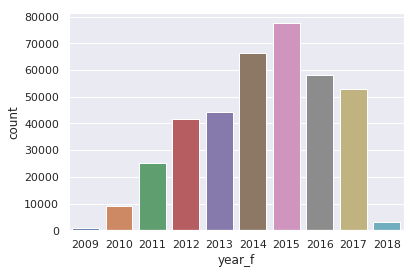

In [25]:
sns.countplot(x='year_f', data=ks_2018, palette='deep')